# Heart Attack Analysis and Prediction

## About Dataset

This dataset contains medical data of different patients having various health inicators using which we can analyze and predict the risk of heart attacks more accurately.

## Source

This dataset is present in Kaggle in the following link:
> https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset

## Data Dictionary

The dataset includes the following features:

- **Age**: Age of the patient.
- **Sex**: Sex of the patient
- **cp**: Chest pain type
  - Value 1: Typical angina
  - Value 2: Atypical angina
  - Value 3: Non-anginal pain
  - Value 4: Asymptomatic
- **trtbps**: Resting blood pressure (in mm Hg)
- **chol**: Cholesterol in mg/dl fetched via BMI sensor
- **fbs**: Fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
- **rest_ecg**: Resting electrocardiographic results
  - Value 0: Normal
  - Value 1: Having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
  - Value 2: Showing probable or definite left ventricular hypertrophy by Estes' criteria
- **thalachh**: Maximum heart rate achieved
- **exng**: Exercise-induced angina (1 = yes; 0 = no)
- **oldpeak**: Numeric Data. This represents ST depression induced by exercise relative to rest for the patients.
- **slp**: This represents the slope of the peak exercise ST segment for the patients. Values are 0,1 and 2.
- **caa**: Number of major vessels (0-3)
- **thal**: Categorical Data. The thalassemia level in blood of patients. Values are 0, 1, 2 and 3.
- **output**: Heart attack risk indicator (0 = less chance of heart attack, 1 = more chance of heart attack)

## Problem Statements

1. **Exploratory Data Analysis(EDA)**: The objective of exploratory data analysis(EDA) is to anlyze the data and uncover patterns and relationships among the data that can influence the prediction of risk of heart attack.
2. **Preprocessing and Cleaning**: Clean the data handling or removing missing values, outliers, duplicate rows and unnecessary features.

### Load Necessary Libraries

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings

from sklearn.ensemble  import IsolationForest
import ppscore as pps

### Settings

In [2]:
# Warning
warnings.filterwarnings("ignore")
# Seaborn plot style
sns.set_style("darkgrid")

# Path
data_path = "../data"
csv_path = os.path.join(data_path, "heart.csv")

### Load Data

In [3]:
df = pd.read_csv(csv_path)

### General Information

In [4]:
# Show 1st 5 rows to get an idea about the data stored in each feature
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
# Data Description
print("=" * 60)
print("DATA DESCRIPTION")
print("=" * 60)
print(f"Number of observations: {df.shape[0]}")
print(f"Number of features: {df.shape[1]}")


DATA DESCRIPTION
Number of observations: 303
Number of features: 14


In [6]:
# Feature Description
print("=" * 60)
print("FEATURE DESCRIPTION")
print("=" * 60)
print(df.dtypes)
print("-" * 60)
# Get numerical and categorical features
num_cols = [col for col in df.columns if df[col].nunique() > 10]
cat_cols = [col for col in df.columns if df[col].nunique() <= 10]

# Print numerical and categorical features
print(f"Number of Numerical features: {len(num_cols)}")
print(num_cols)
print("-" * 60)
print(f"Number of Categorical features: {len(cat_cols)}")
print(cat_cols)

FEATURE DESCRIPTION
age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object
------------------------------------------------------------
Number of Numerical features: 5
['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']
------------------------------------------------------------
Number of Categorical features: 9
['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall', 'output']


In [7]:
# Detect Duplicate Rows
print("=" * 60)
print("DUPLICATE ROW DETECTION")
print("=" * 60)
print(f"Number of duplicate rows: {df.duplicated().sum()}")

DUPLICATE ROW DETECTION
Number of duplicate rows: 1


In [8]:
# Misssing Value Detection
print("=" * 60)
print("MISSING VALUE DETECTION")
print("=" * 60)
if df.isnull().sum().sum() > 0:
    print(df.isnull().sum())
else:
    print("No missing or null value present in any feature.")

MISSING VALUE DETECTION
No missing or null value present in any feature.


### Univariate Analysis

In [11]:
# Statistical Summary of Numerical features
# This will give us a rough idea about distribution of each feature.
print("=" * 60)
print("STATISTICAL SUMMARY OF NUMERICAL FEATURES")
print("=" * 60)
for col in num_cols:
    print(f"Feature: {col}")
    print(f"Mean: {df[col].mean(): .2f}")
    print(f"Median: {df[col].median(): .2f}")
    print(f"Standard Deviation: {df[col].std(): .2f}")
    print(f"Range: {df[col].min()} - {df[col].max()}")
    print("-" * 60)

STATISTICAL SUMMARY OF NUMERICAL FEATURES
Feature: age
Mean:  54.37
Median:  55.00
Standard Deviation:  9.08
Range: 29 - 77
------------------------------------------------------------
Feature: trtbps
Mean:  131.62
Median:  130.00
Standard Deviation:  17.54
Range: 94 - 200
------------------------------------------------------------
Feature: chol
Mean:  246.26
Median:  240.00
Standard Deviation:  51.83
Range: 126 - 564
------------------------------------------------------------
Feature: thalachh
Mean:  149.65
Median:  153.00
Standard Deviation:  22.91
Range: 71 - 202
------------------------------------------------------------
Feature: oldpeak
Mean:  1.04
Median:  0.80
Standard Deviation:  1.16
Range: 0.0 - 6.2
------------------------------------------------------------


(0.0, 1.0, 0.0, 1.0)

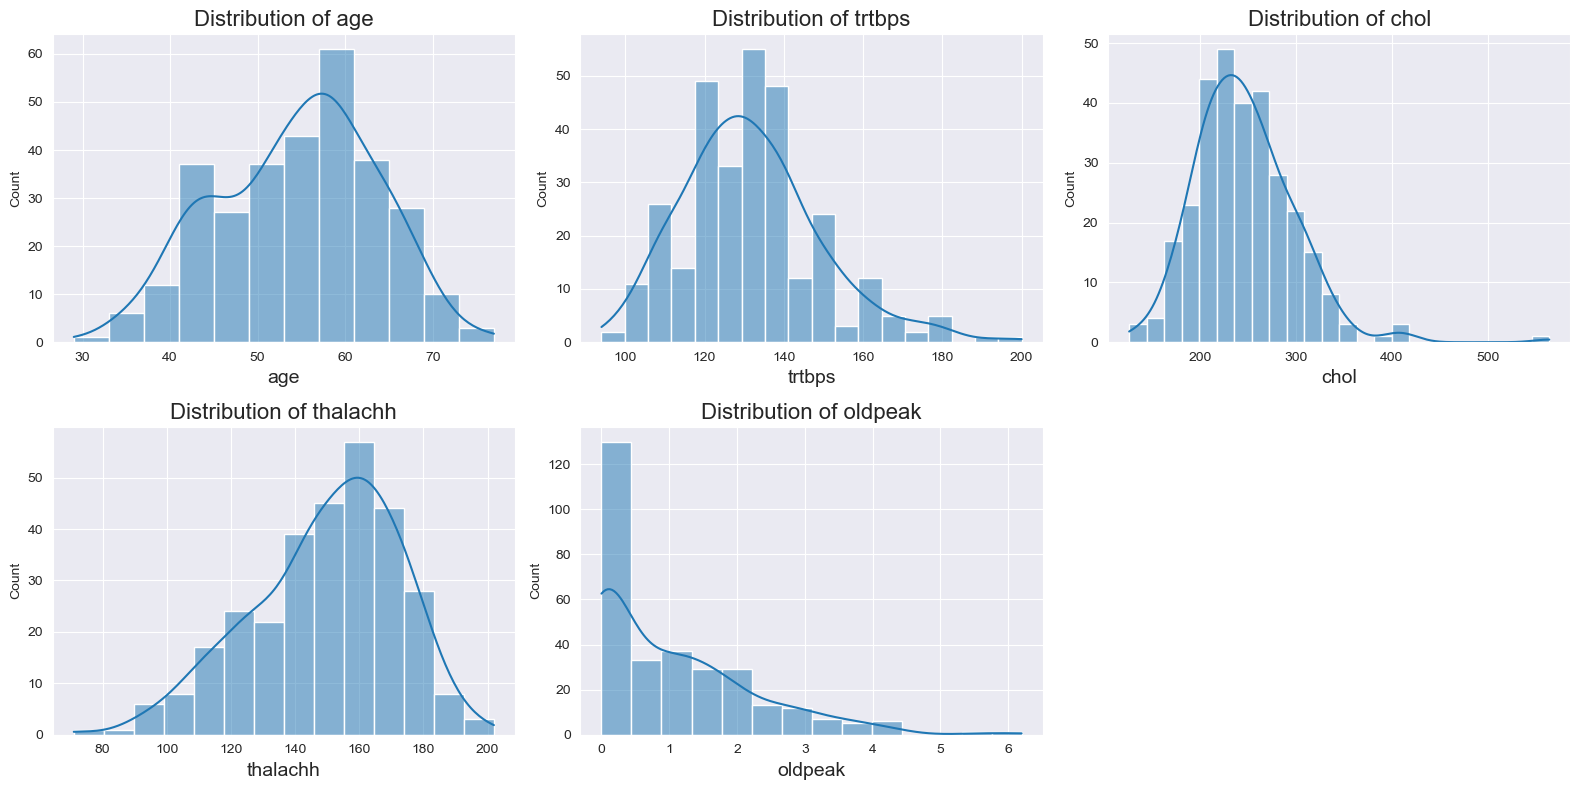

In [10]:
# Visualize the distribution of numerical features using Histogram
fig, axes = plt.subplots(nrows= 2, ncols= 3, figsize=(16,8))
axes = axes.flatten()
for i, col in enumerate(num_cols):
    sns.histplot(data= df, x= col, kde= True, ax = axes[i])
    axes[i].set_title(f"Distribution of {col}", fontsize= 16)
    axes[i].set_xlabel(f"{col}", fontsize= 14)
plt.tight_layout()
axes[-1].axis("off")

### Key Findings

#### Statistical Summary and Histogram Analysis

- Most of the observations have a **age** range **50yrs to 70 yrs**.
- Blood Pressure(**trtbps**) is almost normally distributed but right skewed over **160 mm/Hg**. BP of most of the observations have **above 120 mm/Hg and below 140 mm/Hg**.
- Chelestoral(**chol**) is normally distributed but slightly right skewed above **350**. This is might be due to presence of some outliers.
- Maximum heart rate achieved(**thalachh**) is skewd at left. Most of the observations have max. heart rate above **140**.
- **oldpeak** of most of the observations is **0**.

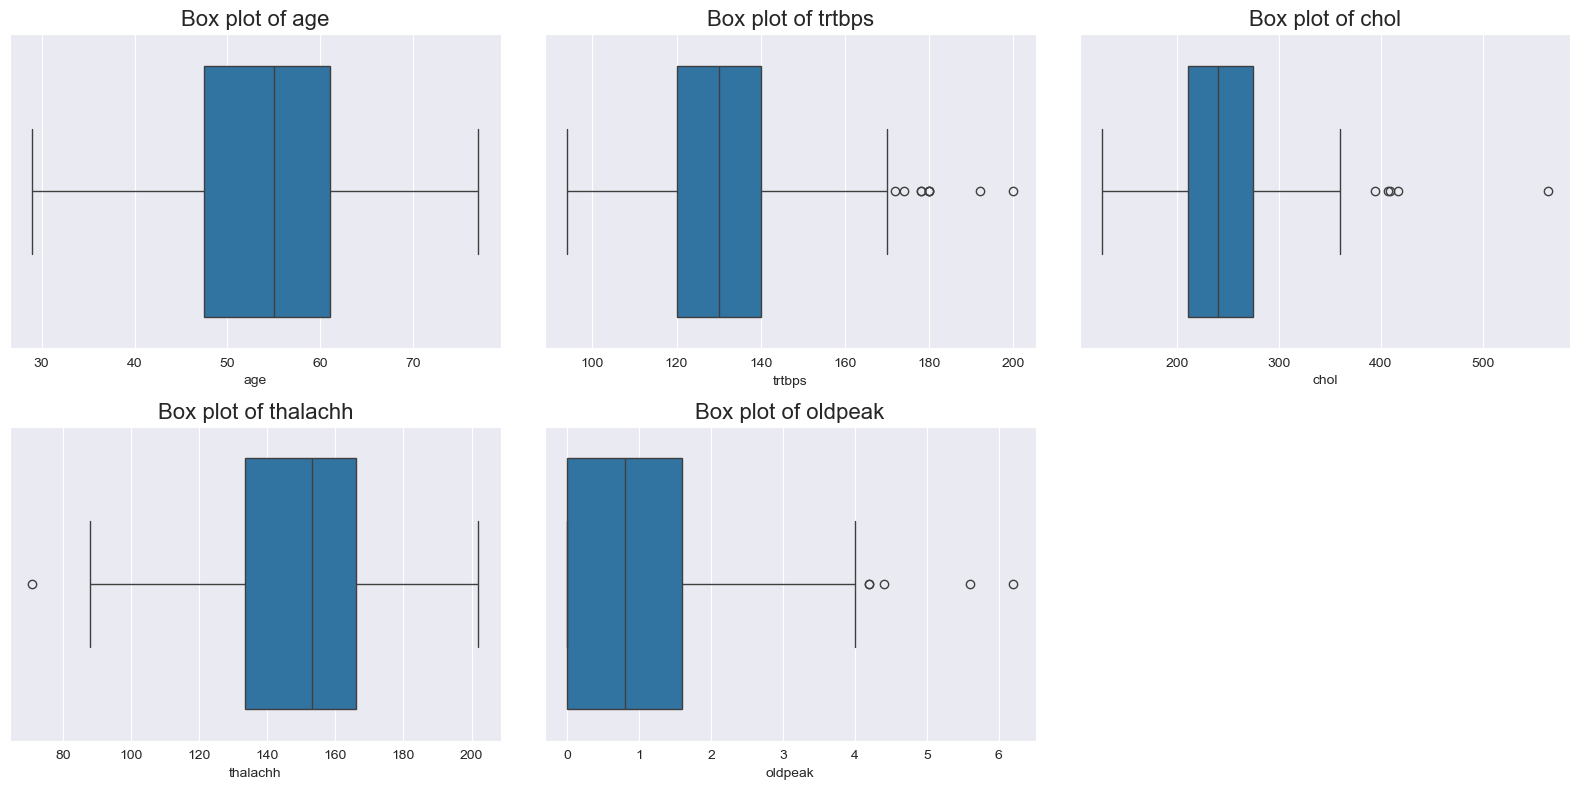

In [17]:
# Outlier detection of each numerical feature using Box Plot
fig, axes = plt.subplots(nrows = 2, ncols= 3, figsize= (16,8))
axes = axes.flatten()
for i, col in enumerate(num_cols):
    sns.boxplot(data= df, x= col, ax= axes[i])
    axes[i].set_title(f"Box plot of {col}", fontsize= 16)
plt.tight_layout()
axes[-1].axis("off")
plt.show()

In [19]:
# Detect presence of outlier rows in the dataset using Isolation Forest
iso = IsolationForest(contamination = 0.1, random_state= 42)
iso.fit(df[num_cols])

IsolationForest(contamination=0.1, random_state=42)

In [21]:
df_o = df.copy()
df_o["Outlier"] = iso.predict(df[num_cols])
outliers = df_o[df_o["Outlier"]== -1]
print("=" * 60)
print("OUTLIER DETECTION BY ISOLATION FOREST")
print("=" * 60)
print(f"Number of outlier rows: {outliers.shape[0]}")

OUTLIER DETECTION BY ISOLATION FOREST
Number of outlier rows: 31


### Key Findings

#### Outlier Detection

- From Box Plot analysis it is found that blood pressure(trtbps), cholestoral(chol) and oldpeak have outliers above upper extreme.
- From Isolation Forest analysis it is found that **31** observations are outliers.

In [12]:
# Count values of Categorical features
# This will count each unique value of a categorical features.
print("=" * 60)
print("COUNTS OF VALUES OF CATEGORICAL FEATURES")
print("=" * 60)
for col in cat_cols:
    print(f"Feature: {col}")
    print(df[col].value_counts())
    print("-" * 60)

COUNTS OF VALUES OF CATEGORICAL FEATURES
Feature: sex
sex
1    207
0     96
Name: count, dtype: int64
------------------------------------------------------------
Feature: cp
cp
0    143
2     87
1     50
3     23
Name: count, dtype: int64
------------------------------------------------------------
Feature: fbs
fbs
0    258
1     45
Name: count, dtype: int64
------------------------------------------------------------
Feature: restecg
restecg
1    152
0    147
2      4
Name: count, dtype: int64
------------------------------------------------------------
Feature: exng
exng
0    204
1     99
Name: count, dtype: int64
------------------------------------------------------------
Feature: slp
slp
2    142
1    140
0     21
Name: count, dtype: int64
------------------------------------------------------------
Feature: caa
caa
0    175
1     65
2     38
3     20
4      5
Name: count, dtype: int64
------------------------------------------------------------
Feature: thall
thall
2    166
3   

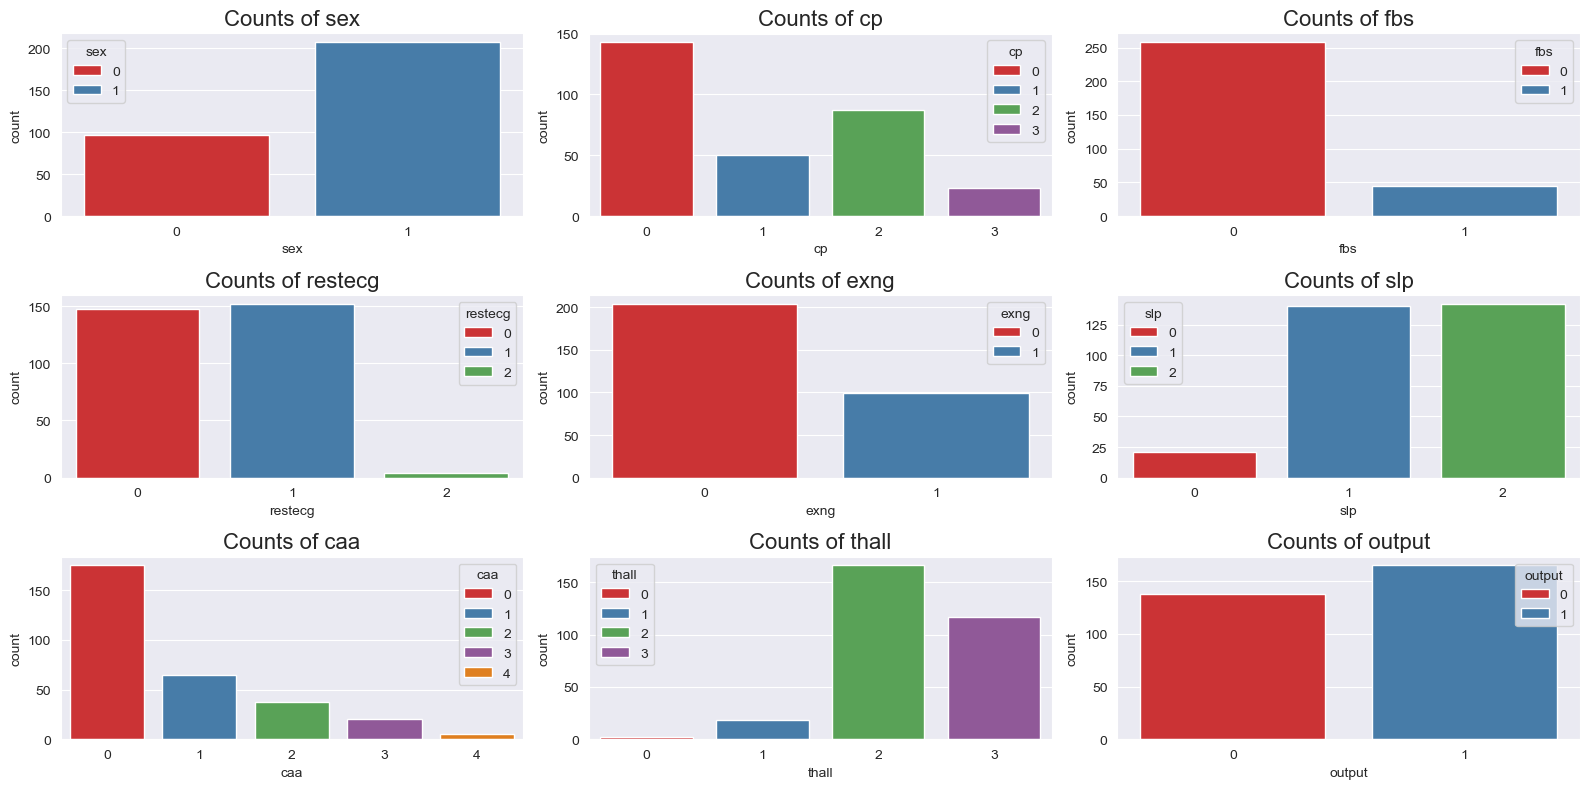

In [14]:
# Visualize it using count plot
fig, axes = plt.subplots(nrows= 3, ncols= 3, figsize=(16,8))
axes= axes.flatten()
for i, col in enumerate(cat_cols):
    sns.countplot(data=df, x= col, hue=col, palette= "Set1", ax= axes[i])
    axes[i].set_title(f"Counts of {col}", fontsize= 16)
    axes[i].set_xlabel(f"{col}")
plt.tight_layout()
plt.show()

### Key Findings

#### Count Plot Analysis

- Most of the observations are **male(1)**.
- Most of the observations have chest paint type **0**.
- Most of the observations have blood suger level(**fbs**) below **120 mg/dl**.
- Most of the observations have Resting electrocardiographic results **0 and 1**.
- Most of the observations **doesn't have** Exercise-induced angina.
- Most of the observations have slope of the peak exercise ST segment(**slp**) **0 and 1**.
- Number of major vessels(**caa**) is 0 for most of the observations.
- Most of the observations have thalassemia level 2 and 3.
- Outout features are almost same for both binary classes. So It is a **Balanced** dataset.

### Correlation Analysis

In [25]:
# Find linear correlation among the numerical features and output using Pearson's correlation co-efficient.

# Add outout to the numerical column list
corr_cols = num_cols + list(["output"])
corr = df[corr_cols].corr().round(2)
corr

,age,trtbps,chol,thalachh,oldpeak,output
age,1.00,0.28,0.21,-0.40,0.21,-0.23
trtbps,0.28,1.00,0.12,-0.05,0.19,-0.14
chol,0.21,0.12,1.00,-0.01,0.05,-0.09
thalachh,-0.40,-0.05,-0.01,1.00,-0.34,0.42
oldpeak,0.21,0.19,0.05,-0.34,1.00,-0.43
output,-0.23,-0.14,-0.09,0.42,-0.43,1.00


In [30]:
# Find Predictive Power Score for numerical features to find nonlinear correlation among the numeric features and output
pps_matrix = pps.matrix(df[corr_cols])
pps_matrix[(pps_matrix["x"] != pps_matrix["y"]) & (pps_matrix["ppscore"] > 0.2)]

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model


### Key Findings

#### Correlation Analyiss

- From Pearson's correlation it is found that oldpeak has **modarate positive** correlation with output.
- From Pearson's correlation it is found that thalachh has **modarate negetive** correlation with output.

### Data Cleaning

In [32]:
# Delete duplicate row
df_o = df_o.drop_duplicates()

In [36]:
# Remove outlier rows
df_wo = df_o[df_o["Outlier"] == 1]
df_wo.drop("Outlier", axis= 1, inplace= True)
df_wo.shape

(271, 14)

In [37]:
# Save the data after cleaning
file_path = os.path.join(data_path, "heart_wo.csv")
df_wo.to_csv(file_path, index= False)